activation functions

a = w(가중치)* x + b(바이어스)

f(a)

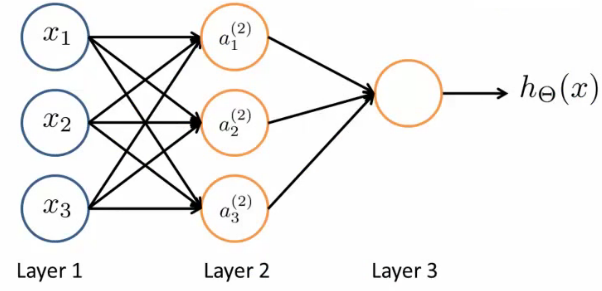

-identity //input을 그대로

-ReLU //Rectified Linear Unit VG를 없애기위해 나왔습니다.

VG란 backpropagation이 진행될수록 전달 값들이 희미해지는 현상입니다.

-Sigmoid //0 or 1

-Leaky ReLU

-tanh

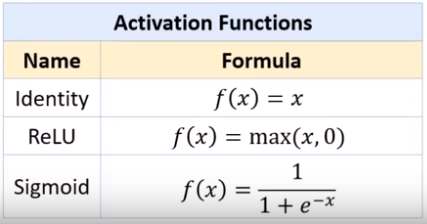

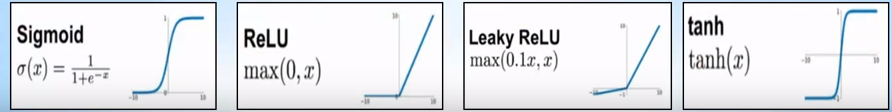

# Neural network cost function

<용어 정리>

L = Layer 의 갯수

sl = l 번째 레이어의 unit 갯수

마지막 Layer는 sL로 표시합니다.

K = 결과값(output)의 갯수 = Output layer의 unit 갯수

hΘ*(x)k = 결과값 중 k번째 unit 값

NNs - one of the most powerful learning algorithms

-Is a learning algorithm for fitting the derived parameters given a training set  

-Let's have a first look at a neural network cost function

Focus on application of NNs for classification problems

Here's the set up

-Training set is {(x1, y1), (x2, y2), (x3, y3) ... (xn, ym)

-L = number of layers in the network

--In our example below L = 4

-sl = number of units (not counting bias unit) in layer l 

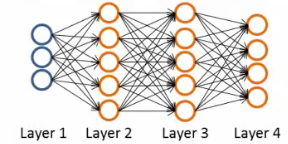

l = 4

s1 = 3

s2 = 5

s3 = 5

s4 = 4

k = 4

## Types of classification problems with NNs

두 가지 유형이 있습니다. 

- Binary classification

결과가 하나(0 아니면 1)로 나타나므로 sL은 1

k는 '1' output unit의 단위수

sL(output layer) = 1

- Multi-class classification

sL = 'k'(여기서 K는 3보다 큽니다.)

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Two types of classification, as we've previously seen

- Binary classification

1 output (0 or 1)

So single output node - value is going to be a real number

k = 1

NB k is number of units in output layer

sL = 1

- Multi-class classification

k distinct classifications

Typically k is greater than or equal to three

If only two just go for binary

sL = k

So y is a k-dimensional vector of real numbers

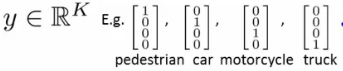

여기서 Rk는 기존의 y값(output)이 0 또는 1만 나왔을 때 와 달리 k개의 output이 나오므로 Rk로 표시해줍니다.

## Cost function for neural networks

The (regularized) logistic regression cost function is as follows;

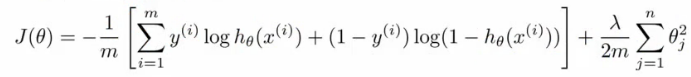

마지막에 추가된 항은 Regularization때문에 발생됩니다.

큰 숫자를 θ 앞에 붙여주게 되면 costfunction을 최소화하기위해서는 θ가 0에 가까워 져야합니다. 

즉, θ가 0에 가까워진다는 의미입니다. 

그렇게 되면 θ가 지니는 비중이 자연스럽게 줄어들어 overfitting문제를 해결할 수 있습니다.. 

For neural networks our cost function is a generalization of this equation above, so instead of one output we generate k outputs

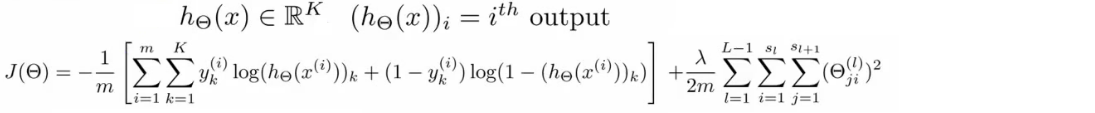

Theta 원소들의 합을 구하기 위함

y(i)k는 1 또는 0입니다. 따라서 y가 1이면 log(h)만 남고 0이면 log(1-h)만 남습니다. 

그러므로 두개의 시그마는 그냥 Output Layer의 요소갑을 모두 더한것 입니다.

정규화항의 경우 세개의 시그마로 구성되어있습니다. 이 역시 풀어보면 모든  θ2을 더한 것 입니다.


Our cost function now outputs a k dimensional vector

-hƟ(x) is a k dimensional vector, so hƟ(x)i refers to the ith value in that vector

Costfunction J(Ɵ) is

-[-1/m] times a sum of a similar term to which we had for logic regression

-But now this is also a sum from k = 1 through to K (K is number of output nodes)

--Summation is a sum over the k output units - i.e. for each of the possible classes

--So if we had 4 output units then the sum is k = 1 to 4 of the logistic regression over each of the four output units in turn

-This looks really complicated, but it's not so difficult

--We don't sum over the bias terms (hence starting at 1 for the summation)

---Even if you do and end up regularizing the bias term this is not a big problem

--Is just summation over the terms

Woah there - lets take a second to try and understand this!

There are basically two halves to the neural network logistic regression cost function

- First half

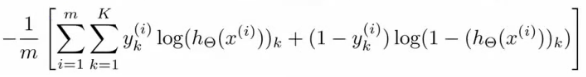

This is just saying

For each training data example (i.e. 1 to m - the first summation)

Sum for each position in the output vector

This is an average sum of logistic regression

- Second half

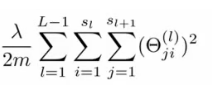

This is a massive regularization summation term, which I'm not going to walk through, but it's a fairly straightforward triple nested summation

This is also called a weight decay term

As before, the lambda value determines the important of the two halves

The regularization term is similar to that in logistic regression

So, we have a cost function, but how do we minimize this bad boy?!

# Back propagation algorithm

쓰는 이유는 costfunction의 최소화를 위해서 입니다. 

목표 minΘJ(Θ)

이를 위해서는 J(Θ)(costfunction)편미분을 계산해야합니다.


We previously spoke about the neural network cost function

Now we're going to deal with back propagation

-Algorithm used to minimize the cost function, as it allows us to calculate partial derivatives!

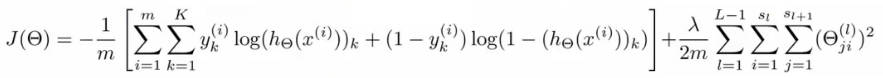

The cost function used is shown above

-We want to find parameters Ɵ which minimize J(Ɵ)

-To do so we can use one of the algorithms already described such as

--Gradient descent

--Advanced optimization algorithms

To minimize a cost function we just write code which computes the following

-J(Ɵ) //costfunction

--i.e. the cost function itself!

--Use the formula above to calculate this value, so we've done that

-Partial derivative terms

--So now we need some way to do that

---This is not trivial! Ɵ is indexed in three dimensions because we have separate parameter values for each node in each layer going to each node in the following layer

---i.e. each layer has a Ɵ matrix associated with it! 

----We want to calculate the partial derivative Ɵ with respect to a single parameter 

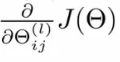

//costfunction을 편미분!

--Remember that the partial derivative term we calculate above is a REAL number (not a vector or a matrix)

---Ɵ is the input parameters 

----Ɵ1 is the matrix of weights which define the function mapping from layer 1 to layer 2

----Ɵ101 is the real number parameter which you multiply the bias unit (i.e. 1) with for the bias unit input into the first unit in the second layer

----Ɵ111 is the real number parameter which you multiply the first (real) unit with for the first input into the first unit in the second layer

----Ɵ211 is the real number parameter which you multiply the first (real) unit with for the first input into the second unit in the second layer

----As discussed, Ɵijl i

-----i here represents the unit in layer l+1 you're mapping to (destination node)

-----j is the unit in layer l you're mapping from (origin node)

-----l is the layer your mapping from (to layer l+1) (origin layer)

-----NB

------The terms destination node, origin node and origin layer are terms I've made up!

--So - this partial derivative term is 

---The partial derivative of a 3-way indexed dataset with respect to a real number (which is one of the values in that dataset)

-Gradient computation

--One training example

--Imagine we just have a single pair (x,y) - entire training set

--How would we deal with this example?

--The forward propagation algorithm operates as follows

---Layer 1

----a1 = x 

----z2 = Ɵ1a1

---Layer 2

----a2 = g(z2) (add a02)

----z3 = Ɵ2a2

---Layer 3

----a3 = g(z3) (add a03)

----z4 = Ɵ3a3

---Output

----a4 = hƟ(x) = g(z4)

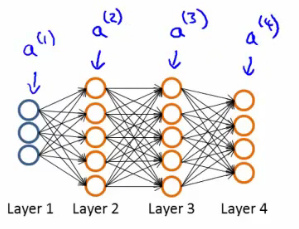

-This is the vectorized implementation of forward propagation

--Lets compute activation values sequentially (below just re-iterates what we had above!)

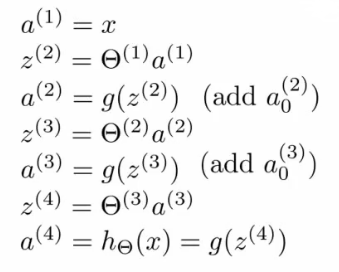

## What is back propagation?

처음으로 backpropagation에서는 모든 unit에 대하여 δ를 계산해야합니다.

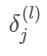

l번째 층의 j번째 노드의 “error”

마지막 layer에 대해서

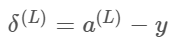

이러한 방식으로 오차값을 구할 수 있습니다. L은 위에서 정의한 대로 NNs의 마지막 Layer를 뜻합니다. 

마지막 layer 이전의 오류를 구하려면

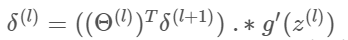

.*는 행렬안의 요소값끼리 곱하는 것입니다.

l번째 층의 오류 δ는 다음 층의 오류 δ(l+1)과 theta metrix의 곱 그리고 activation function(sigmoid function)의 미분 g'의 곱으로 구할 수 있습니다. 

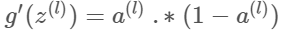

다시 쓰면

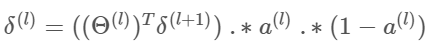

Use it to compute the partial derivatives

Before we dive into the mechanics, let's get an idea regarding the intuition of the algorithm

-For each node we can calculate (δjl) - this is the error of node j in layer l

--If we remember, ajl is the activation of node j in layer l 

--Remember the activation is a totally calculated value, so we'd expect there to be some error compared to the "real" value

---The delta term captures this error

---But the problem here is, "what is this 'real' value, and how do we calculate it?!"

----The NN is a totally artificial construct

----The only "real" value we have is our actual classification (our y value) - so that's where we start

If we use our example and look at the fourth (output) layer, we can first calculate

-δj4 = aj4 - yj

--[Activation of the unit] - [the actual value observed in the training example]

--We could also write aj4 as hƟ(x)j

---Although I'm not sure why we would?

-This is an individual example implementation

Instead of focussing on each node, let's think about this as a vectorized problem

-δ4 = a4 - y

--So here δ4 is the vector of errors for the 4th layer

--a4 is the vector of activation values for the 4th layer

With δ4 calculated, we can determine the error terms for the other layers as follows;

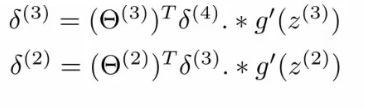

Taking a second to break this down

-Ɵ3 is the vector of parameters for the 3->4 layer mapping

-δ4 is (as calculated) the error vector for the 4th layer

-g'(z3) is the first derivative of the activation function g evaluated by the input values given by z3 

--You can do the calculus if you want (...), but when you calculate this derivative you get

--g'(z3) = a3 . * (1 - a3)

-So, more easily

--δ3 = (Ɵ3)T δ4 . *(a3 . * (1 - a3)) 

-. * is the element wise multiplication between the two vectors

--Why element wise? Because this is essentially an extension of individual values in a vectorized implementation, so element wise multiplication gives that effect

--We highlighted it just in case you think it's a typo!

## Analyzing the mathematics

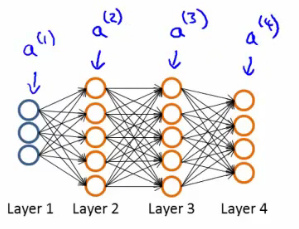

And if we take a second to consider the vector dimensionality (with our example above [3-5-5-4])
-Ɵ3 = is a matrix which is [4 X 5] (if we don't include the bias term, 4 X 6 if we do)

--(Ɵ3)T = therefore, is a [5 X 4] matrix

-δ4 = is a 4x1 vector

-So when we multiply a [5 X 4] matrix with a [4 X 1] vector we get a [5 X 1] vector

-Which, low and behold, is the same dimensionality as the a3 vector, meaning we can run our pairwise multiplication

For δ3 when you calculate the derivative terms you get

a3 . * (1 - a3)

Similarly For δ2 when you calculate the derivative terms you get

a2 . * (1 - a2)

-So to calculate δ2 we do

-δ2 = (Ɵ2)T δ3 . *(a2 . * (1 - a2))

There's no δ1 term

-Because that was the input!

## Why do we do this?

모든 unit의 오차값을 구하기 위해 위 과정을 수행합니다.

costfunction을 최소화하려면 편미분을 해야하고

오차값을 구하면 편미분을 할 수 있기 때문입니다.

We do all this to get all the δ terms, and we want the δ terms because through a very complicated derivation you can use δ to get the partial derivative of Ɵ with respect to individual parameters (if you ignore regularization, or regularization is 0, which we deal with later)

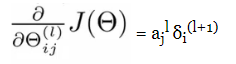

By doing back propagation and computing the delta terms you can then compute the partial derivative terms

-We need the partial derivatives to minimize the cost function!

## Putting it all together to get the partial derivatives!

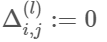

Delta는 costfunction 편미분의 값들을 저장합니다. costfunction의 미분값을 최소화하는 데 사용됩니다.

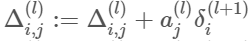

벡터로 나타내면

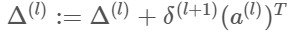

D는 costfunction의 미분값입니다. 이때 j = 0  과 0이 아닌 것으로 나뉘는데

0번 feature는 정규화를 적용하지 않기 때문입니다.

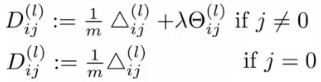

What is really happening - lets look at a more complex example

Training set of m examples

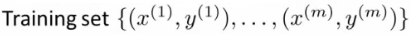

First, set the delta values

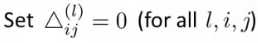

-Set equal to 0 for all values

-Eventually these Δ values will be used to compute the partial derivative

--Will be used as accumulators for computing the partial derivatives

Next, loop through the training set



-i.e. for each example in the training set (dealing with each example as (x,y)

-Set a1 (activation of input layer) = xi 

-Perform forward propagation to compute al for each layer (l = 1,2, ... L)

--i.e. run forward propagation

-Then, use the output label for the specific example we're looking at to calculate δL where δL = aL - yi

--So we initially calculate the delta value for the output layer

--Then, using back propagation we move back through the network from layer L-1 down to layer 

-Finally, use Δ to accumulate the partial derivative terms

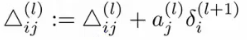

-Note here

--l = layer

--j = node in that layer

--i = the error of the affected node in the target layer

-You can vectorize the Δ expression too, as

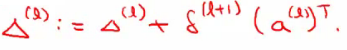

Finally

-After executing the body of the loop, exit the for loop and compute 

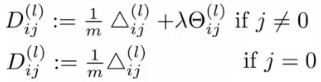

--When j = 0 we have no regularization term

At the end of ALL this

-You've calculated all the D terms above using Δ

--NB - each D term above is a real number!

-We can show that each D is equal to the following

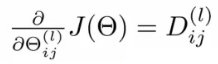

-We have calculated the partial derivative for each parameter

--We can then use these in gradient descent or one of the advanced optimization algorithms

Phew!

-What a load of hassle!

# Back propagation intuition

Some additionally back propagation notes

-In case you found the preceding unclear, which it shouldn't be as it's fairly heavily modified with my own explanatory notes

Back propagation is hard(ish...)

-But don't let that discourage you

-It's hard in as much as it's confusing - it's not difficult, just complex 

Looking at mechanical steps of back propagation

## Forward propagation with pictures!

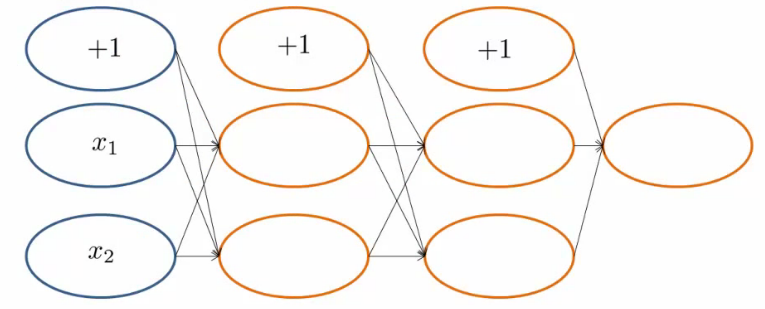

Feeding input into the input layer (xi, yi) 

-Note that x and y here are vectors from 1 to n where n is the number of features

--So above, our data has two features (hence x1 and x2)

With out input data present we use forward propagation

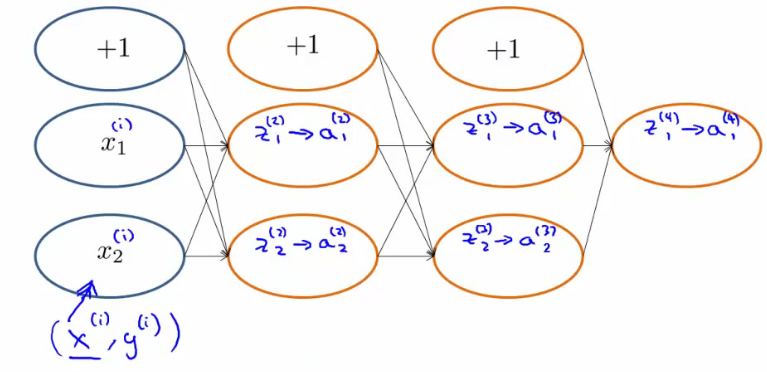

The sigmoid function applied to the z values gives the activation values

-Below we show exactly how the z value is calculated for an example

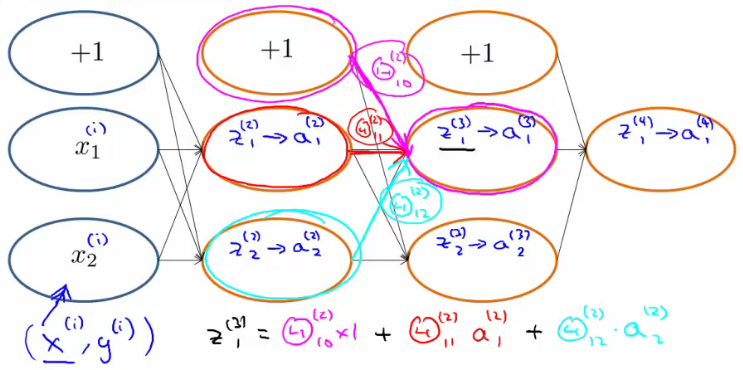

## Back propagation

With forwardprop done we move on to do back propagation 

Back propagation is doing something very similar to forward propagation, but backwards

-Very similar though

Let's look at the cost function again...

-Below we have the cost function if there is a single output (i.e. binary classification)

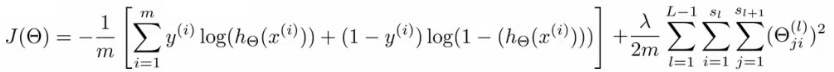

This function cycles over each example, so the cost for one example really boils down to this

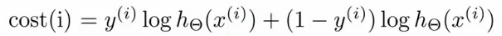

Which, we can think of as a sigmoidal version of the squared difference (check out the derivation if you don't believe me)

-So, basically saying, "how well is the network doing on example i "?

We can think about a δ term on a unit as the "error" of cost for the activation value associated with a unit

-More formally (don't worry about this...), δ is

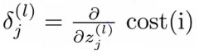

--Where cost is as defined above

--Cost function is a function of y value and the hypothesis function

So - for the output layer, back propagation sets the δ value as [a - y]

-Difference between activation and actual value

We then propagate these values backwards;

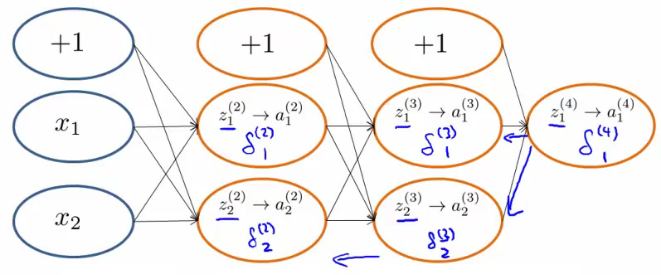

Looking at another example to see how we actually calculate the delta value;

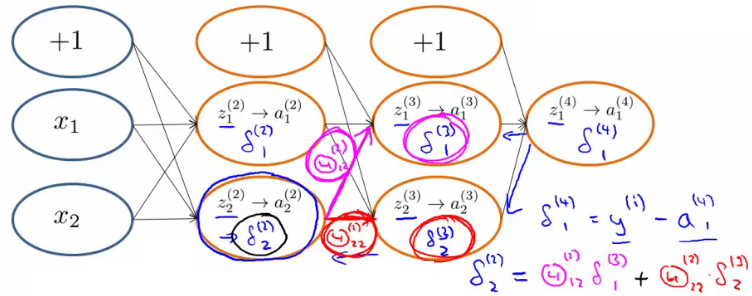

So, in effect, 

-Back propagation calculates the δ, and those δ values are the weighted sum of the next layer's delta values, weighted by the parameter associated with the links

-Forward propagation calculates the activation (a) values, which 

Depending on how you implement you may compute the delta values of the bias values

-However, these aren't actually used, so it's a bit inefficient, but not a lot more!

# Implementation notes - unrolling parameters (matrices)

<설명>

unrolling이란 프로그래밍을 전개할 때 계산을 편하게 하기 위해 벡터화 하는 것 입니다.

반대로 알아보기 쉽게 보여줄 때는 다시 행렬로 펼쳐야 합니다.

<예시>

layer1의 unit 갯수(s1) = 10, s2 = 10, s3 = 1 라고 가정

미분값(D) 역시 같은 크기의 행렬


In [7]:
#python

import numpy as np

#1은 요소10 2는 요소10 3은 요소1
#sj+1 x sj +1
theta1 = np.ones((10,11)) # 10 * 11
theta2 = 2*np.ones((10,11)) # 10 * 11
theta3 = 3*np.ones((1,11)) # 1 * 11

thetaVec1 = theta1.reshape((110,1)) #각각 벡터화
thetaVec2 = theta2.reshape((110,1))
thetaVec3 = theta3.reshape((11,1))

thetaVec = np.vstack((theta1,theta2,theta3)) #행렬 합치기

thetaVec = thetaVec.reshape(-1,1) #벡터화
#thetaVec = thetaVec.reshape(231,1) #벡터화

thetaVec

#thetaVec.shape

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

Octave는 주로 수치 해석을 목적으로 한 고수준의 해석 언어입니다. 

GNU Octave 언어는 Matlab과 매우 유사하여 대부분의 프로그램을 쉽게 이식 할 수 있습니다.

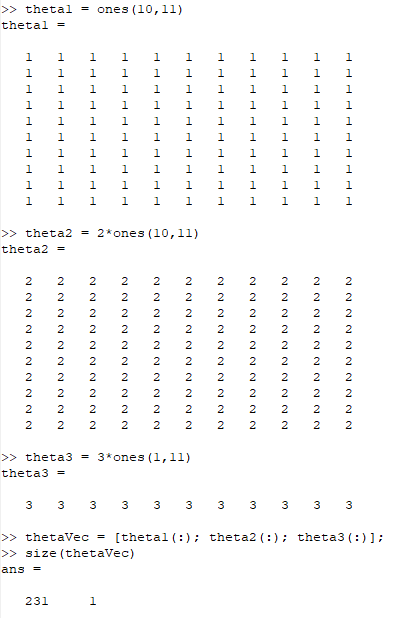

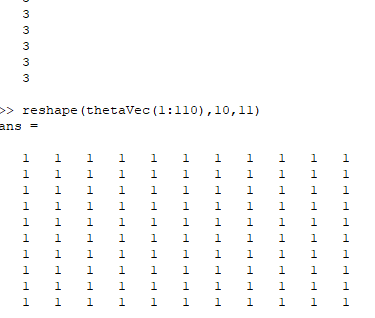

Needed for using advanced optimization routines

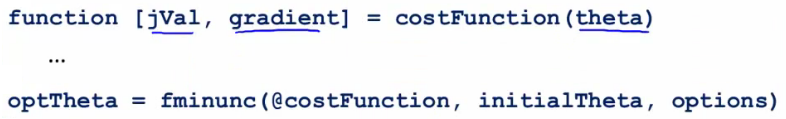

Is the MATLAB/octave code

-But theta is going to be matrices 

fminunc takes the costfunction and initial theta values

-These routines assume theta is a parameter vector

-Also assumes the gradient created by costFunction is a vector

For NNs, our parameters are matrices

-e.g.

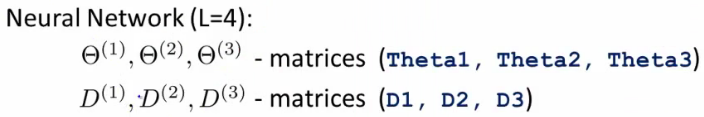

Example

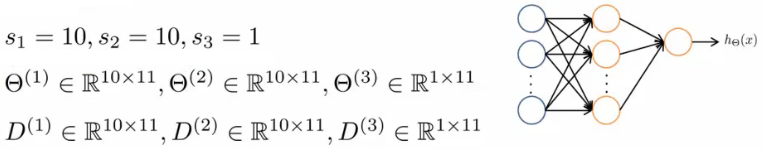

Use the thetaVec = [ Theta1(:); Theta2(:); Theta3(:)]; notation to unroll the matrices into a long vector

To go back you use

Theta1 = resape(thetaVec(1:110), 10, 11)

# Gradient checking

theta값이 많고 매우 복잡한 알고리즘을 짜다보면 미분으로 오차를 구할 때 오류가 나타날 수 있습니다.

미분이 정확히 수행되고 있는 지 확인하기위해 써줍니다.

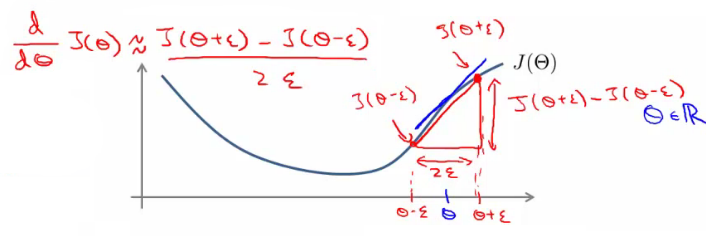

우리가 흔히 이야기하는 미분은 costfunction의 대각선으로 그려진 파란색선을 의미합니다. 이 선이 바로 미분값, 기울기, 오차, gradient라고 불립니다. 

두 점을 잇는 선을 그리고 이의 높이를 가로폭으로 나누면 파란선의 근사치가 구해집니다. 바로 빨간선 입니다. 

식으로 나타내면 이렇습니다.

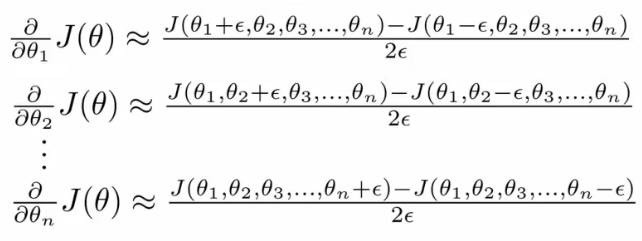

여기서 ϵ는 입실론(epsilon)이라고 부르며 이는 보통 10(-4제곱)로 사용합니다. 

만약 ϵ 값을 적정하게 설정하지 않는다면 오류가 발생할 수 있습니다.


Backpropagation has a lot of details, small bugs can be present and ruin it :-(

-This may mean it looks like J(Ɵ) is decreasing, but in reality it may not be decreasing by as much as it should

So using a numeric method to check the gradient can help diagnose a bug

-Gradient checking helps make sure an implementation is working correctly

Example

-Have an function J(Ɵ)

-Estimate derivative of function at point Ɵ (where Ɵ is a real number)

-How?

--Numerically

---Compute Ɵ + ε

---Compute Ɵ - ε

---Join them by a straight line

---Use the slope of that line as an approximation to the derivative

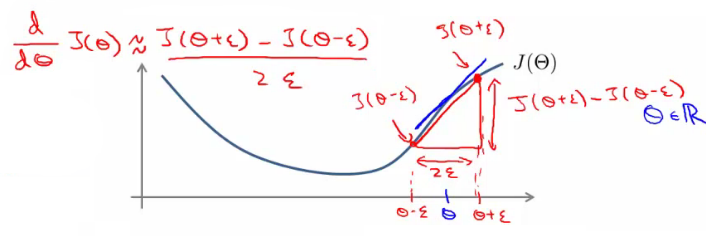

Usually, epsilon is pretty small (0.0001)

-If epsilon becomes REALLY small then the term BECOMES the slopes derivative 

The is the two sided difference (as opposed to one sided difference, which would be J(Ɵ + ε) - J(Ɵ) /ε

If Ɵ is a vector with n elements we can use a similar approach to look at the partial derivatives

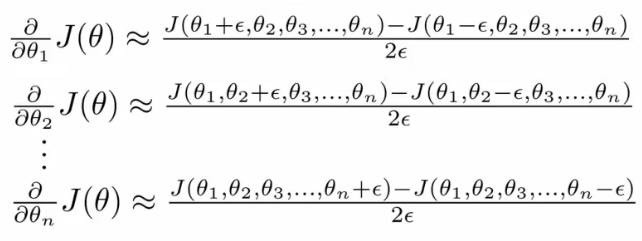

So, in octave we use the following code the numerically compute the derivatives

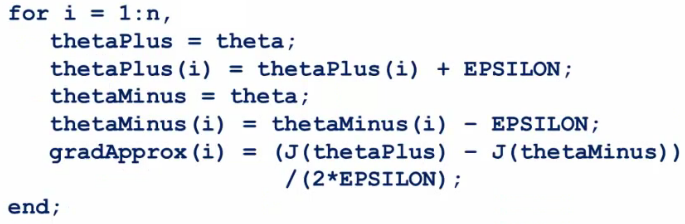

gradient checking은 computationally expensive 하기 때문에 학습할 때는 반드시 꺼야 합니다. 

이것을 해결한 알고리즘이 Backpropagation이기 때문입니다. 

gradApprox(gradient checking)

DVec(backpropagation)

So on each loop thetaPlus = theta except for thetaPlus(i)

-Resets thetaPlus on each loop

Create a vector of partial derivative approximations

Using the vector of gradients from backprop (DVec)

-Check that gradApprox is basically equal to DVec

-Gives confidence that the Backproc implementation is correc

Implementation note

-Implement back propagation to compute DVec

-Implement numerical gradient checking to compute gradApprox

-Check they're basically the same (up to a few decimal places)

-Before using the code for learning turn off gradient checking

--Why?

---GradAprox stuff is very computationally expensive

---In contrast backprop is much more efficient (just more fiddly)

# Random Initialization

Gradient descent 또는 advanced optimization 을 사용하기 전에 θ 는 어떤 값으로든 초기화해야합니다.

Pick random small initial values for all the theta values

-If you start them on zero (which does work for linear regression) then the algorithm fails - all activation values for each layer are the same

So chose random values!

-Between 0 and 1, then scale by epsilon (where epsilon is a constant)

# Putting it all together

1) - pick a network architecture

-Number of

--Input units - number of dimensions x (dimensions of feature vector)

--Output units - number of classes in classification problem

--Hidden units

---Default might be

----1 hidden layer

---Should probably have

----Same number of units in each layer

----Or 1.5-2 x number of input features

---Normally

----More hidden units is better

----But more is more computational expensive

-We'll discuss architecture more later

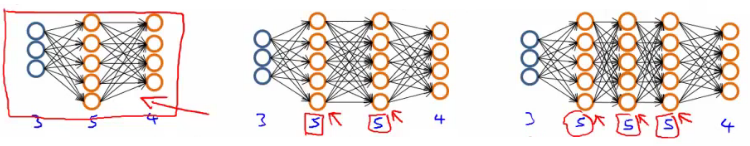

2) - Training a neural network

-2.1) Randomly initialize the weights

--Small values near 0

-2.2) Implement forward propagation to get hƟ(x)i for any xi

//xi에 대한 hƟ(x)i를 구하기 위해 forward propagation을 먼저 해줍니다.

-2.3) Implement code to compute the cost function J(Ɵ)

-2.4) Implement back propagation to compute the partial derivatives

-General implementation below

for i = 1:m {
     
     Forward propagation on (xi, yi) --> get activation (a) terms
     
     Back propagation on (xi, yi) --> get delta (δ) terms
     
     Compute Δ := Δl + δl+1(al)T
}

With this done compute the partial derivative terms

-Notes on implementation

--Usually done with a for loop over training examples (for forward and back propagation)

//for loop를 사용한 training 예제

--Can be done without a for loop, but this is a much more complicated way of doing things

--Be careful

2.5) Use gradient checking to compare the partial derivatives computed using the above algorithm and numerical estimation of gradient of J(Ɵ)

-Disable the gradient checking code for when you actually run it

//gradient checking이 실제로 실행될 때 사용하지 않도록 설정합니다.

2.6) Use gradient descent or an advanced optimization method with back propagation to try to minimize J(Ɵ) as a function of parameters Ɵ

-Here J(Ɵ) is non-convex

--Can be susceptible to local minimum

--In practice this is not usually a huge problem

--Can't guarantee programs with find global optimum should find good local optimum at least

동그라미 친 부분이 최소값인데 y에 매우 가깝습니다.

올라온 부분을 택했다면 hypothesis는 y와 멀다는 것을 알 수 있습니다.

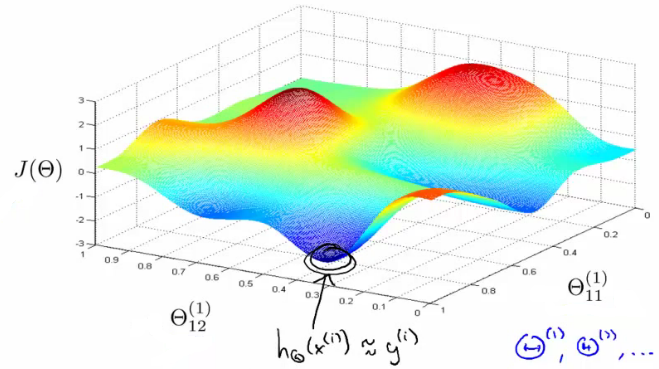